# Puntos fijos y puntos periódicos

Sabemos, y/o vimos en el notebook anterior, que los puntos fijos y puntos periódicos son importantes en los sistemas dinámicos.

Recordemos que $x^s$ es un **punto fijo** del mapeo $f_\mu$ si
$$ f_\mu(x^s) = x^s. $$

#### Ejercicio

¿Cuál es la definición de un punto periódico de periodo $p$?

Vimos que el iterar un mapeo permite encontrar puntos fijos y puntos periódicos **estables**. Sin embargo, por definición no permite encontrar los puntos inestables, los cuales juegan un papel muy importante en los sistemas dinámicos, e.g. los caóticos.

¿Cómo podemos, entonces, encontrar puntos fijos numéricamente?

## El método de Newton

Los puntos fijos y los puntos periódicos satisfacen ecuaciones nolineales de la forma
$$f_\mu(x^s) = x^s.$$
Queremos, entonces, resolver numéricamente una ecuación nolineal de esta forma.

Sabemos que en general no existe ningún método analítico para hacerlo, aún con ecuaciones polinomiales (de grado $\ge 5$). Por lo tanto, cualquier método de solución deberá ser un **algoritmo iterativo**: consistirá en una iteración, cuyos iterados convergen a la solución de la ecuación.

Uno de los algoritmos más utilizados es el **método de Newton**. Dada una función $f(x)$, intentará encontrar una **raíz** de $f$, es decir un $x^*$ para la cual $f(x^*) = 0$.

Supón que tengamos una adivinanza $x_0$ para la raíz. Queremos encontrar una manera de mejorarla a $x_1 := x_0 + \delta$; es decir, queremos encontrar una $\delta$ que acercará la adivinanza inicial a una mejor.

Queremos que $x_0 + \delta$ sea una raíz, por lo cual $f(x_0 + \delta) = 0$.
Expandimos en una serie de Taylor hasta primer orden, lo cual nos da

$$ f(x_0) + \delta \, f'(x_0) \simeq 0, $$

y por lo tanto

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}.$$

Ahora repetimos para generar la secuencia de aproximaciones $(x_n)$ con

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$$


#### Ejercicio

[1] Implementa el algoritmo de Newton. La función `newton` debe aceptar dos funciones, $f$ y $f'$, así como $x_0$. Regresa la raíz después de un cierto número de iteraciones. 

**Opcional: Repite la iteración hasta que converja, utilizando un bucle `while`.

[2] Utilízalo para encontrar la raíz cuadrada de un número $y$, y compara con la función `sqrt` de Julia.

In [103]:
function newton(f, f′, x0, N=20)   # \prime<TAB>
    
    x = x0
    
    for i in 1:N
        x = x - ( f(x) / f′(x) )
        
        # @show x
    end
    
    return x
end

newton (generic function with 3 methods)

In [6]:
y = 17

g(x) = x^2 - y
g′(x) = 2x

newton(g, g′, 10000.0)

x = 5000.00085
x = 2500.002124999711
x = 1250.0044624969657
x = 625.009031224207
x = 312.51811541558686
x = 156.28625613111905
x = 78.19751544555325
x = 39.20745682851635
x = 19.82052390898197
x = 10.339110356230158
x = 5.991676202761852
x = 4.41447283936659
x = 4.132721139897277
x = 4.123116811723828
x = 4.123105625632834
x = 4.123105625617661
x = 4.123105625617661
x = 4.123105625617661
x = 4.123105625617661
x = 4.123105625617661


4.123105625617661

In [5]:
sqrt(17)

4.123105625617661

In [7]:
logistico(μ, x) = μ*x*(1-x)
logistico′(μ, x) = μ*(1-2x)

logistico′ (generic function with 1 method)

In [ ]:
newton(g, g′, 10000.0)

In [16]:
μ = 0.5

function punto_fijo(μ)
    return newton(x->logistico(μ,x) - x, x->logistico′(μ,x) - 1, 0.5)
end

punto_fijo (generic function with 1 method)

In [17]:
punto_fijo(0.5)

0.0

In [18]:
punto_fijo(1.1)

0.09090909090909108

In [19]:
punto_fijo(3.0)

0.6666666666666667

In [20]:
punto_fijo(3.5)

0.7142857142857143

In [21]:
μs = 0:0.01:4.0

puntos_fijos = [ ]   # o Float64[ ]

for μ in μs
    push!(puntos_fijos, punto_fijo(μ))
end

In [25]:
puntos_fijos

401-element Array{Any,1}:
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 ⋮       
 0.742931
 0.74359 
 0.744246
 0.744898
 0.745547
 0.746193
 0.746835
 0.747475
 0.748111
 0.748744
 0.749373
 0.75    

Para aplicar la función `punto_fijo` a cada elemento de `puntos_fijos`:

In [27]:
puntos_fijos = punto_fijo.(μs)   # "broadcasting"

401-element Array{Float64,1}:
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 ⋮       
 0.742931
 0.74359 
 0.744246
 0.744898
 0.745547
 0.746193
 0.746835
 0.747475
 0.748111
 0.748744
 0.749373
 0.75    

In [22]:
using Plots; gr()

Plots.GRBackend()

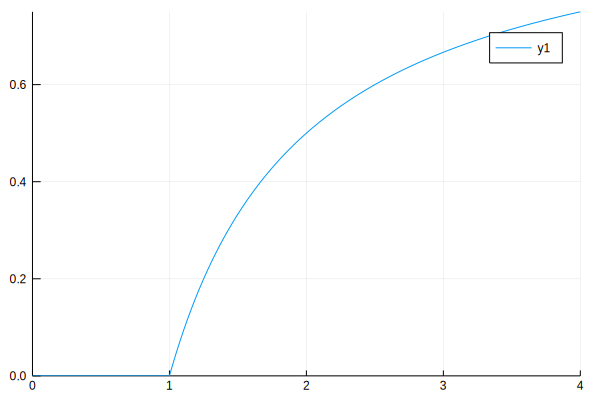

In [24]:
plot(μs, puntos_fijos)

#### Ejercicio
Utiliza el método de Newton para encontrar el punto fijo no trivial del mapeo logístico para distintos valores de $\mu$.

## Estabilidad lineal

Recuerda que un punto fijo $x^s$ de un mapeo 1D es **estable** si $|f'(x^s)| < 1$.

#### Ejercicio

Para cada $\mu$, encuentra la estabilidad del punto fijo correspondiente del mapeo logístico. Dibuja los estables y los inestables de forma separada. ¿Dónde está la bifurcación?

In [29]:
estabilidades = Bool[ ]

for i in 1:length(μs)
    μ = μs[i]
    x_fijo = puntos_fijos[i]
    
    if abs(logistico′(μ, x_fijo)) < 1
        estable = true
        
    else
        estable = false
    end
    
    push!(estabilidades, estable)
end

In [30]:
estabilidades

401-element Array{Bool,1}:
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [31]:
estable = ( abs(3) < 1 )

false

In [32]:
puntos_fijos[estabilidades]

300-element Array{Float64,1}:
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 ⋮       
 0.652778
 0.653979
 0.655172
 0.656357
 0.657534
 0.658703
 0.659864
 0.661017
 0.662162
 0.6633  
 0.66443 
 0.665552

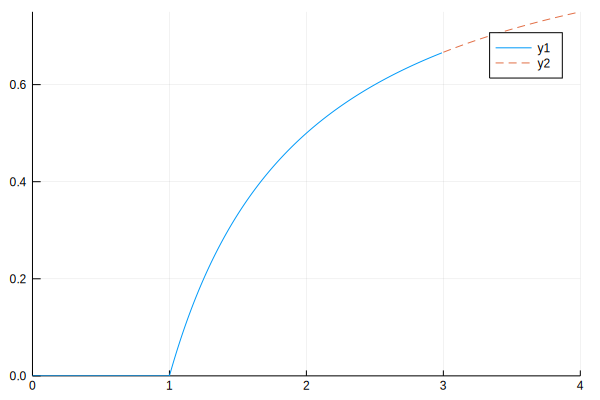

In [43]:
plot(μs[estabilidades], puntos_fijos[estabilidades])
plot!(μs[.!(estabilidades)], puntos_fijos[.!(estabilidades)], ls=:dash)


## Diferenciación automática

Hasta ahora, hemos calculado derivadas de forma manual y analítica. Sin embargo, existe una técnica *archi-poderosa* para calcular derivadas de forma numérica, llamada la **diferenciación automática**. La idea es aplicar las reglas del cálculo diferencial de forma sistemática, pero siempre *numéricamente*.

Los detalles se proveen en [este notebook](2a. Diferenciacion automatica.ipynb).

Podemos definir un nuevo método de `newton` que utiliza la diferenciación automática proveída por el paquete `ForwardDiff.jl`. 

Primero definimos una función que calcula la derivada de una función dada:

In [46]:
deriv(f) = x->ForwardDiff.derivative(f, x)

deriv (generic function with 1 method)

Nota que ¡`deriv` *regresa una función*!

In [47]:
newton(f, x) = newton(f, deriv(f), x)

newton (generic function with 2 methods)

Aquí, *no* tenemos que repetir el contenido de `newton`; simplemente creamos una nueva *versión* o *método* de `newton`, que echa mano del código ya existente, y ¡le pasa la derivada automática!

In [49]:
using ForwardDiff

In [51]:
μ = 1.1
newton(x->logistico(μ,x) - x, 0.5)

0.0909090909090909

## Órbitas periódicas

In [56]:
μ = 3.55
newton(x->logistico(μ, logistico(μ, x)) - x, 0.5)

0.4180381405696286

In [58]:
x0s = 0.0:0.01:1.0
pfs = newton.(x->logistico(μ, logistico(μ, x)) - x, x0s)

101-element Array{Float64,1}:
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 ⋮       
 0.863652
 0.863652
 0.863652
 0.863652
 0.863652
 0.863652
 0.863652
 0.863652
 0.863652
 0.863652
 0.863652
 0.863652

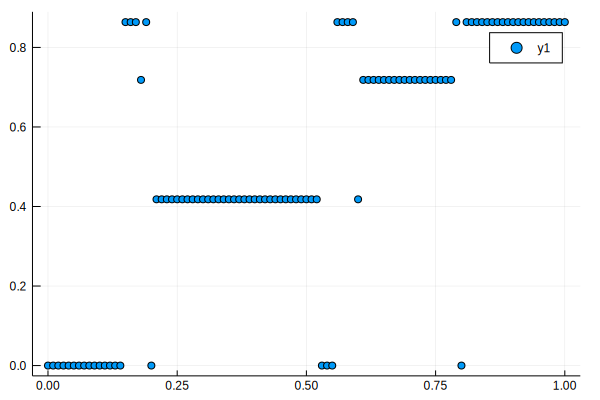

In [61]:
scatter(x0s, pfs)

In [62]:
unique(pfs)

8-element Array{Float64,1}:
 0.0     
 0.863652
 0.71831 
 0.418038
 0.418038
 0.418038
 0.418038
 0.71831 

In [65]:
for pf in pfs
    println(pf)
end

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8636520002754419
0.8636520002754419
0.8636520002754419
0.7183098591549296
0.8636520002754419
0.0
0.41803814056962846
0.41803814056962874
0.4180381405696286
0.41803814056962857
0.4180381405696286
0.41803814056962846
0.4180381405696286
0.41803814056962857
0.4180381405696286
0.41803814056962857
0.41803814056962846
0.4180381405696286
0.41803814056962874
0.4180381405696286
0.4180381405696286
0.41803814056962857
0.4180381405696286
0.41803814056962874
0.4180381405696286
0.4180381405696286
0.4180381405696286
0.4180381405696286
0.41803814056962846
0.4180381405696286
0.41803814056962857
0.41803814056962857
0.4180381405696286
0.4180381405696286
0.4180381405696286
0.4180381405696286
0.41803814056962874
0.4180381405696286
0.0
0.0
0.0
0.8636520002754419
0.8636520002754419
0.8636520002754419
0.8636520002754419
0.4180381405696286
0.7183098591549295
0.7183098591549295
0.7183098591549296
0.7183098591549296
0.7183098591549296
0.718309859154929

In [67]:
unique(round.(pfs, 5))

4-element Array{Float64,1}:
 0.0    
 0.86365
 0.71831
 0.41804

#### Ejercicio

[1] Define una función `iterar` que acepta una función `f` y un número `n`, y regresa la función iterada $n$ veces (¡como función¡).

[2] Verifica que la diferenciación automática ¡funciona automáticamente para derivar las funciones iteradas! [Ojo: Tal vez no sea la manera más eficiente [es decir, rápida] de calcular las derivadas. Ejercicio: Verifícalo.]

[3] Así, calcula puntos periódicos del mapeo logístico de periodo 2, 4 etc.

## Bifurcaciones en el mapeo logístico

Sabemos que las bifurcaciones en el mapeo logístico (para valores suficientemente pequeños de $\mu$) son de tipo doblamiento de periodo (también conocido como "flip"), los cuales ocurren cuando la estabilidad del punto periódico cambia, es decir cuando $(f_\mu^p)'(x^s(\mu))$ atraviese $-1$.

Podemos entonces buscar los valores críticos $\mu_c$ de $\mu$, al resolver la ecuación nolineal

$$b^p(\mu) := (f_\mu^p)'(x^s(\mu)) + 1 = 0$$

para $\mu$.

#### Ejercicio

[1] Define una función $x^s(f, \mu)$ que encuentre un punto fijo de $f$.

[2] Utiliza el método de Newton para encontrar los valores de $\mu$ en los cuales ocurren las bifurcaciones.

In [73]:
punto_fijo(μ) = newton(x->logistico(μ,x) - x, 0.5)

punto_fijo (generic function with 1 method)

In [74]:
g(μ) = logistico′(μ, punto_fijo(μ)) + 1

g (generic function with 1 method)

In [75]:
newton(g, 3.1)

3.0

In [76]:
log_iter_2(μ, x) = logistico(μ, logistico(μ, x))

log_iter_2 (generic function with 1 method)

In [77]:
punto_fijo2(μ) = newton(x->log_iter_2(μ,x) - x, 0.5)

punto_fijo2 (generic function with 1 method)

In [84]:
punto_fijo2(3.1)

0.5580141252026959

In [85]:
g2(μ) = deriv(x->log_iter_2(μ, x))(punto_fijo2(μ)) + 1

g2 (generic function with 1 method)

In [87]:
newton(g2, 3.1)

3.4494897427831774

## Precisión arbitraria

Julia permite trabajar con números de precisión arbitraria, en lugar de los `Float64`. 
Provee el tipo `BigFloat`, cuya precisión se puede especificar:

In [88]:
setprecision(1000)  # número de bits de precisión

1000

In [90]:
bits(3.1)

"0100000000001000110011001100110011001100110011001100110011001101"

In [89]:
x = big(3.1)

3.10000000000000008881784197001252323389053344726562500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [5]:
x = big"3.1"

3.09999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999985

In [93]:
setrounding(BigFloat, RoundUp) do
    parse(BigFloat, "3.1")
end

3.10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000022

In [98]:
xxx = big"3.1"

3.10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000022

In [99]:
f(x) = 3x^2 - 2

f (generic function with 1 method)

In [100]:
f(xxx)

2.68300000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000047e+01

In [101]:
newton(g2, big"3.1")

3.44948974278317809819728407470589139196594748065667012843269256725096037745731502653985943310464023481859460122661418912485886545983775734162578395123727855282891274752767657124763010527091177022348131067898669085363244335254560403380880893937458556784657472436130414427027021617420183830008158980783751

In [104]:
setprecision(10000)

10000

In [106]:
a = newton(g2, deriv(g2), big"3.1", 100)

3.44948974278317809819728407470589139196594748065667012843269256725096037745731502653985943310464023481859460122661418912485886545983775734162578395123727855282891274752767657124763010527091177022348131067898669085363244335254560403380880893937458556784657472436130414427027021617420183830008158980783801308970072869399363083715809440080044373868754916451465393914501204472644813331629351094474181351328549504446617172663142549764831812450401156604536459009343586167931983665666266909131906535863766105258156179366236179110294672088354575512883552989832410055869020500641546612411735339941043105799289846733953255278736041829655171830391036780038362316629732330282904977391047426360070512637697546888677006409929559257173284645028880915144257463026029529632370755250342275599154542628129800306467207994242530228784262053406794786004659693997993559754061671358654653456248208256276886369280941306372433508864801572484633723244737954548814438479336370091974101477852328755910631598460783103670095353247

In [112]:
caracteres = [c for c in string(a)]

3013-element Array{Char,1}:
 '3'
 '.'
 '4'
 '4'
 '9'
 '4'
 '8'
 '9'
 '7'
 '4'
 '2'
 '7'
 '8'
 ⋮  
 '5'
 '4'
 '2'
 '0'
 '7'
 '3'
 '9'
 '6'
 '2'
 '7'
 '8'
 '5'

In [113]:
using StatsBase

In [115]:
d = countmap(caracteres)

Dict{Char,Int64} with 11 entries:
  '8' => 300
  '6' => 293
  '5' => 305
  '.' => 1
  '7' => 304
  '2' => 303
  '4' => 336
  '1' => 280
  '0' => 299
  '3' => 328
  '9' => 264

11-element Array{Char,1}:
 '8'
 '6'
 '5'
 '.'
 '7'
 '2'
 '4'
 '1'
 '0'
 '3'
 '9'

In [ ]:
#S 3,4,4,9,4,8,9,7,4,2,7,8,3,1,7,8,0,9,8,1,9,7,2,8,4,0,7,4,7,0,5,8,9,1,

# https://oeis.org/A086180/internal


#### Ejercicio

Utiliza `BigFloat` para encontrar los puntos de bifuración con precisión alta.

Pista: [*Nunca repitas código*](https://es.wikipedia.org/wiki/No_te_repitas). Escribe las funciones para que funcionen con *cualquier tipo de entrada*, `Float64` o `BigFloat`.

## Puntos fijos en varias dimensiones

Si tenemos un mapeo $\mathbf{f} : \mathbb{R}^n \to \mathbb{R}^n$, los puntos fijos satisfacen $\mathbf{f}(\mathbf{x^s}) = \mathbf{x^s}$. Por lo tanto, ahora debemos buscar raíces de funciones en $n$ dimensiones.

## Método de Newton en varias dimensiones

De nuevo utilizaremos el método de Newton, pero ahora en varias dimensiones.
El desarrollo es parecido al caso uni-dimensional; la implementación es un tanto más complicada.

Consideremos una adivinanza $\mathbf{x}_0$. Queremos calcular $\pmb{\delta}$ tal que

$$\mathbf{f}(\mathbf{x}_0 + \pmb{\delta}) = \mathbf{0}.$$

Desarrollando en una serie de Taylor a primer orden, obtenemos

$$\mathbf{f}(\mathbf{x}_0) + (D \, \mathbf{f})(\mathbf{x}_0) \cdot \pmb{\delta} = \mathbf{0},$$

donde $$(D \, \mathbf{f})(\mathbf{x}_0)$$ es la matriz jacobiana de $\mathbf{f}$ en el punto $\mathbf{x}_0$.

y por lo tanto $\pmb{\delta}$ es la solución al sistema de ecuaciones lineales

$$(D \, \mathbf{f})(\mathbf{x}_0) \cdot \pmb{\delta} = -\mathbf{f}(\mathbf{x}_0).$$

Luego la siguiente aproximación a la raíz es $\mathbf{x}_1 := \mathbf{x}_0 + \pmb{\delta}$.

### Implementación 

Para implementar este método en la computadora, primero debemos calcular la matriz jacobiana, luego resolver el sistema de ecuaciones.

La matriz jacobiana se puede calcular utilizando diferenciación automática. Se encuentra implementada en el paquete `ForwardDiff.jl`. La función $\mathbf{f}$ debe tomar un vector y regresar un vector, e.g.

In [122]:
function f(xx)
    x, y = xx    # deshacer el vector xx en las componentes x y y
    
    return [x + y, x^2 - y^2]
end

f (generic function with 1 method)

También se puede escribir como sigue:

In [123]:
f1(xx) = ( (x, y) = xx; [x + y, x^2 - y] )

f1 (generic function with 1 method)

In [124]:
using ForwardDiff

In [125]:
J = ForwardDiff.jacobian(f, [1, 2])

2×2 Array{Int64,2}:
 1   1
 2  -4

Ahora si se tiene un vector `b`, para resolver el sistema de ecuaciones $\mathsf{J} \cdot \mathbf{x} = \mathbf{b}$ para $\mathbf{x}$, Julia utiliza el operador `\`:

In [9]:
b = [3, 4]

x = J \ b

2-element Array{Float64,1}:
 2.66667 
 0.333333

In [10]:
J * x

2-element Array{Float64,1}:
 3.0
 4.0

#### Ejercicio

[1] Implementa el método de Newton en varias dimensiones con vectores. 

[2] Aplícalo para encontrar los puntos fijos del siguiente sistema de EDOs:

$$
\begin{align}
\dot{x} &= x \, (3 - x - 2y)\\
\dot{y} &= y \, (2 - x - y).
\end{align}
$$

Para hacerlo, inicia desde distintas condiciones iniciales en el plano (e.g. aleatorios con `rand(2)`) y acumula una lista de puntos fijos encontrados con Newton.

Al final, limpia los puntos fijos al redondearlos con `round.(x, 5)` y luego utiliza la función `unique`.